In [10]:
%matplotlib inline

from math import *
from pylab import *

import numpy as np
import matplotlib.pyplot as plt

In [11]:
BITS_PER_SAMPLE = 16        # bits
SAMPLE_RATE     = 125e6     # Hz
# SAMPLE_RATE     = 5e6     # Hz

### 0. Helper Functions

In [12]:
def bytes_from_bin_file(fileName, chunkSize=2):
    with open(fileName, 'rb') as f:
        while True:
            chunk = f.read(chunkSize)
            if chunk:
                yield chunk
            else:
                break

### 1. Original (No Memory Extension)

##### 1.1 Calculations

In [13]:
maxMemBytes = 16**4/2
maxNumMemSamples = maxMemBytes * 8 / BITS_PER_SAMPLE

print('Per channel:')
print('Max memory allocated  = {:>5} = 16^{:<2} bytes'.format(int(maxMemBytes), int(log2(maxMemBytes)/log2(16))))
print('Max number of samples = {:>5} =  2^{:<2}'.format(int(maxNumMemSamples), int(log2(maxNumMemSamples))))

Per channel:
Max memory allocated  = 32768 = 16^3  bytes
Max number of samples = 16384 =  2^14


In [14]:
signalPeriod = maxNumMemSamples / SAMPLE_RATE
signalFrequency = 1 / signalPeriod

print('Singal period   = {:>10.5f} μs'.format(signalPeriod * 1e6))
print('Signal frequncy = {:>10.5f} Hz'.format(signalFrequency))

Singal period   =  131.07200 μs
Signal frequncy = 7629.39453 Hz


#### 1.2 Data & Graphs

In [15]:
ch1 = []

# dataFileName = '3815Hz_32768_125MHz_raw/data_file_2024-01-10_10-32-12'
# dataFileName = '3815Hz_32768_5MHz_raw/data_file_2024-01-10_10-45-56'

dataFileName = '7629Hz_16384_125MHz_raw/data_file_2024-04-29_12-09-15'
# dataFileName = '7629Hz_16384_5MHz_raw/data_file_2024-04-29_12-12-27'


for chunk in bytes_from_bin_file(dataFileName + '.bin'):
    ch1.append(int.from_bytes(chunk, byteorder='little', signed=True))

In [16]:
nSamples = len(ch1)
tSamples = (nSamples / SAMPLE_RATE) * 1e6
# tSamples = (nSamples / 5e6) * 1e6
totDecFactor = maxNumMemSamples / nSamples

print('Sampling time = {} μs'.format(tSamples))
print('Number of samples saved = {}'.format(nSamples))
print('Total decimation factor = {}'.format(totDecFactor))

Sampling time = 131.44 μs
Number of samples saved = 16430
Total decimation factor = 0.9972002434570907


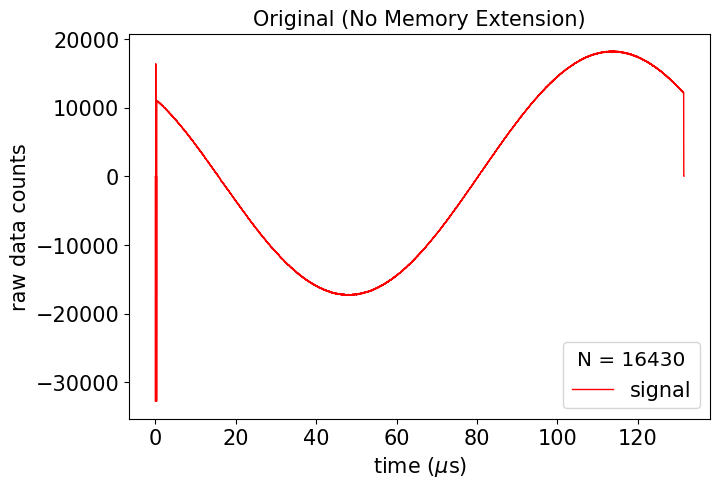

In [17]:
t1 = np.linspace(0, tSamples, nSamples)

plt.figure(figsize=(7.5, 5))

plt.plot(t1, ch1, 'r-', lw=1, label="signal")

plt.title('Original (No Memory Extension)', fontsize=15)
plt.xlabel(r'Time ($\mu$s)', fontsize=15)
plt.ylabel('Raw Data Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 15})

plt.show()

In [18]:
# ch1_np = np.array(ch1)

# np.savetxt(dataFileName + '.txt', np.c_[t1, ch1_np])